## CTA200H Problem Set -- Ayush Pandhi
### Problem 3

In [7]:
#Importing the required modules
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import convolve as conv

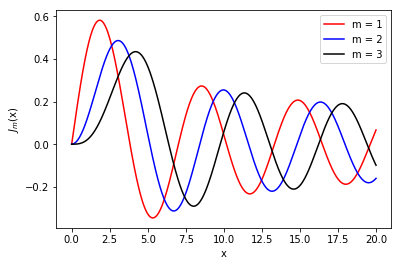

In [8]:
#Solution for part a
#Define the Bessel function
def Besselfunc(m, x):
    return 1 / np.pi * float(integrate.quad(lambda theta: np.cos(m * theta - x * np.sin(theta)), 0, np.pi)[0])

#Setting up x and y for the plot
x = np.linspace(0, 20, 1000)
y = np.vectorize(Besselfunc)

#Plotting for a few values of m
plt.plot(x, y(1, x), 'r', label = "m = 1")
plt.plot(x, y(2, x), 'b', label = "m = 2")
plt.plot(x, y(3, x), 'k', label = "m = 3")
plt.xlabel("x")
plt.ylabel("$J_{m}$(x)")
plt.legend()
plt.show()

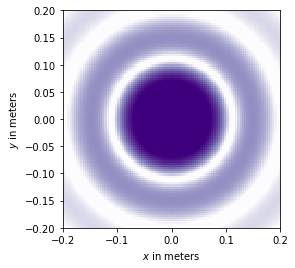

In [9]:
#Solution to part b
#Defining the point spread function and choosing some set of parameters
def Pointspreadfunc(q):
    Izero = 875
    a = 0.19
    wavel = 0.05
    R = 0.7
    x = (2*np.pi*a*q)/(wavel*R)
    return (Izero)*(2*Besselfunc(1, x)/x)**2

#Plotting the 2D airy disk
#Setting up x and [X, Y] meshgrid
x = np.linspace(-0.2, 0.2, 100)
[X, Y] = np.meshgrid(x, x)

#Defining the vectorize of the point spread function and applying it to the radius
Pointspreadfuncvec = np.vectorize(Pointspreadfunc)
radius = np.sqrt(X**2 + Y**2)
output = Pointspreadfuncvec(radius)

#Plotting the point spread function in 2D
#extent() gives correct values for x and y in meters, otherwise get 0 - 100 range on both axis
plt.imshow(np.log(output), extent=(-0.2, 0.2, -0.2, 0.2), cmap='Purples', vmin=0, vmax=5)
plt.xlabel('$x$ in meters')
plt.ylabel('$y$ in meters')
plt.show()

In [10]:
#Solution to part c
#This part might take some time to run, sorry about that!

#Turning the picture into a usable array
pillars = mpimg.imread("pillarsofcreation.jpg")
pillarsnp = pillars.mean(axis=-1)

#Setting up x, y and the [X, Y] meshgrid
x = np.linspace(-0.5, 0.5, 101)
y = np.linspace(-0.5, 0.5, 100)
[X, Y] = np.meshgrid(x, y)

#Defining the vectorize of the point spread function and applying it to the radius
Pointspreadfuncvec = np.vectorize(Pointspreadfunc)
radius2 = np.sqrt(X**2 + Y**2)
output = Pointspreadfuncvec(radius2)

#Convolving our image by our point spread function
conv1 = conv(pillarsnp, output)

Text(0.5,1,'Original Image')

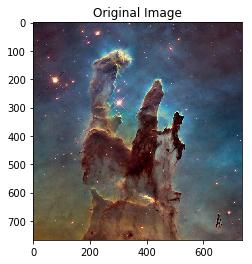

In [11]:
#Original Image
plt.imshow(pillars)
plt.title("Original Image")

Text(0.5,1,'Convolved Image')

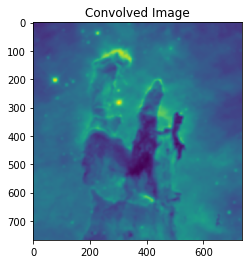

In [12]:
#Convolved Image
plt.imshow(conv1)
plt.title("Convolved Image")